# Showcase: Using the US Census Bureau ACS API
> Extracting employment information from the [United States Census Bureau](https://www.census.gov/) using the [American Community Survey](https://www.census.gov/programs-surveys/acs/data.html) (ACS) API

In [84]:
# import our packages
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import requests
import pandas as pd
import numpy as np

## US - Unemployment Rates between 2012-2022 excl. 2020

**Reference material:**
- [2020 ACS 1-year Estimates](https://www.census.gov/programs-surveys/acs/technical-documentation/table-and-geography-changes/2020/1-year.html) - are not included as the Census Bureau didn't release them due to the impacts of COVID-19.
- [Employment Status for Population 16 years and Over (B23025)](https://api.census.gov/data/2022/acs/acs1/groups/B23025.html) 

In [ ]:
# collect our ACS 1-year estimates data
HOST, dataset = "https://api.census.gov/data", "acs/acs1"
get_vars = ["B23025_003E", "B23025_005E"]
# B23025_003E - Civilian labor force
# B23025_005E - Civilian labor force!!Unemployed

predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "us:*"

# Initialize DataFrame collector
dfs = []
for year in range(2012, 2023):
    if year == 2020:
        # there was no 2020 data but would still like to chart it so we'll add 0 value data for reference
        data = [[0, 0]]
        
        # load the data into dataframe
        df = pd.DataFrame(columns=['civ_labor_force', 'civ_lf_unem'],  data=data)
            
        # Add column to hold year value
        df["year"] = year
    
        # Convert columns to integers
        df = df.astype({"civ_labor_force": int, "civ_lf_unem": int})
        dfs.append(df)
        
        continue ## there is no ACS data for 2020 due to the pandemic
    
    # create the base url and request the data
    base_url = "/".join([HOST, str(year), dataset])
    r = requests.get(base_url, params=predicates)
    
    # verify that we did get data
    if r.status_code == 200:
        # Extract data without the last column (us)
        data_without_last_column = [row[:-1] for row in r.json()[1:]]
        
        # load the data into datafram
        df = pd.DataFrame(columns=['civ_labor_force', 'civ_lf_unem'],  data=data_without_last_column)
            
        # Add column to hold year value
        df["year"] = year
    
        # Convert columns to integers
        df = df.astype({"civ_labor_force": int, "civ_lf_unem": int})
        dfs.append(df)
        # print(r.url)
    
    # otherwise report the error
    else:
        print(f"Failed to retrieve data.\nStatus code: {r.status_code}\nResponse: {r.text}\nURL: {r.url}")
        break

# Concatenate all DataFrames in collector
employment_rate = pd.concat(dfs, ignore_index=True)

# calculate the level of unemployment
employment_rate['pct_unemployed'] = 100 * (employment_rate['civ_lf_unem'] / employment_rate['civ_labor_force'])

# Display our summary table
employment_rate[["year", "pct_unemployed"]]

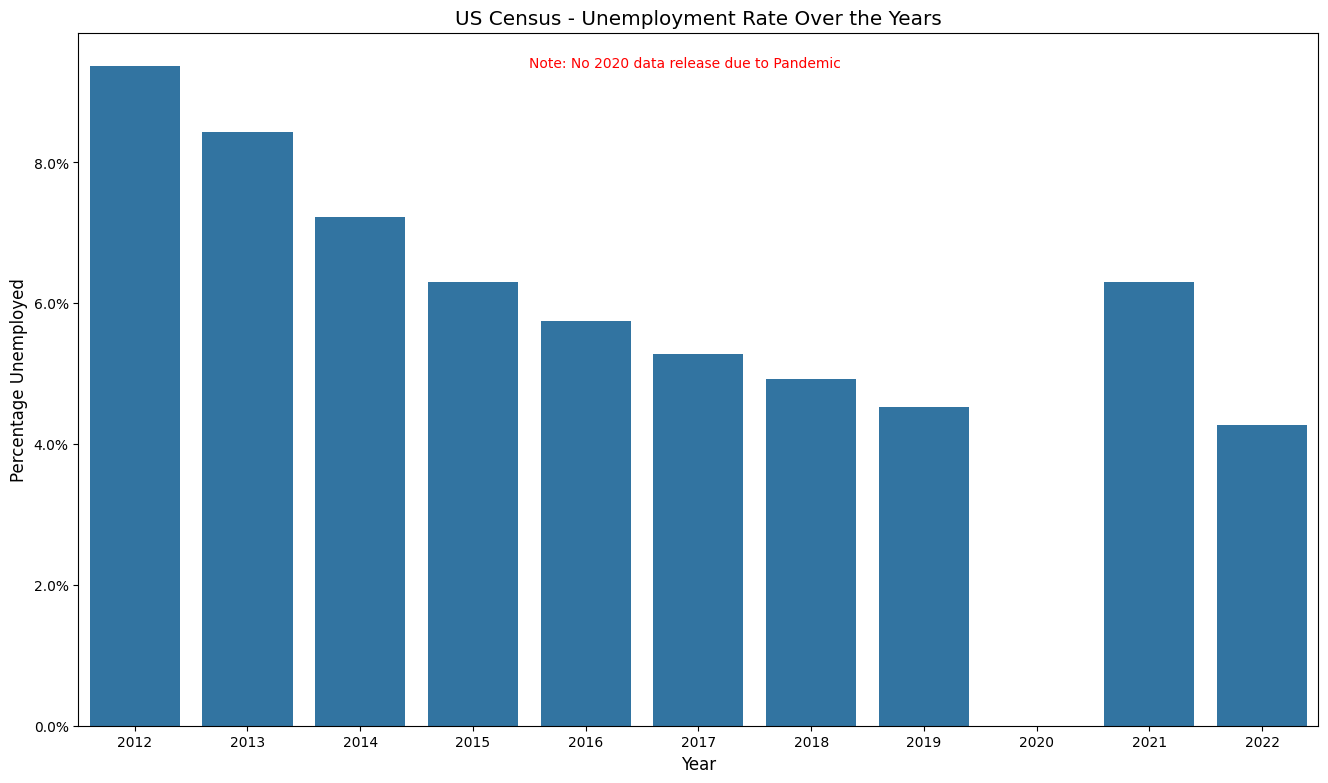

In [131]:
# plot our data
plt.figure(figsize=(16,9))
ax = sns.barplot(x='year', 
            y='pct_unemployed',
            data=employment_rate
            )
plt.title('US Census - Unemployment Rate Over the Years', fontsize='x-large')
plt.xlabel('Year', fontsize='large')
plt.ylabel('Percentage Unemployed', fontsize='large')

# Add a note about the year 2020
plt.text(3.5, 9.5, 'Note: No 2020 data release due to Pandemic', ha='left', va='top', color='red', fontsize=10)

# Display our y-axis as a Percentage
ax.yaxis.set_major_formatter(PercentFormatter(100))

plt.show()

# US - Labor Force Participation Between Groups By Year
## 2012-2022 excl. 2020

### Data comes from multiple tables as it is segregated by Race. 
**Subset: [Sex by Age by Employment Status for the Population 16 Years and Over](https://api.census.gov/data/2022/acs/acs1/groups.html)**
- [B23002H](https://api.census.gov/data/2022/acs/acs1/groups/B23002H.html) - White Alone, Not Hispanic or Latino 
- [B23002B](https://api.census.gov/data/2022/acs/acs1/groups/B23002B.html) - Black
- [B23002D](https://api.census.gov/data/2022/acs/acs1/groups/B23002D.html) - Asian
- [B23002I](https://api.census.gov/data/2022/acs/acs1/groups/B23002I.html) - Hispanic

In [132]:
# Data comes from multiple tables as it is segregated by Race. 
# Group level - https://api.census.gov/data/2012/acs/acs1/groups.html
# White - [B23002H](https://api.census.gov/data/2012/acs/acs1/groups/B23002H.html)
# Black - [B23002B](https://api.census.gov/data/2012/acs/acs1/groups/B23002B.html)
# Asian - [B23002D](https://api.census.gov/data/2012/acs/acs1/groups/B23002D.html)
# Hispanic - [B23002I](https://api.census.gov/data/2012/acs/acs1/groups/B23002I.html)
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
HOST, dataset = "https://api.census.gov/data", "acs/acs1"

get_vars = ["B23002H_017E", "B23002H_018E", "B23002H_056E", "B23002H_057E" ]
# B23002H_017E - White alone - not hispanic or latino Male 25 to 54 Total
# B23002H_018E - White alone - not hispanic or latino Male 25 to 54 In labor force

# B23002H_056E - White alone - not hispanic or latino Female 25 to 54 Total
# B23002H_057E - White alone - not hispanic or latino Female 25 to 54 In labor force

get_vars += ["B23002B_017E", "B23002B_018E", "B23002B_056E", "B23002B_057E" ]
# B23002B_017E - Black Male 25 to 54 Total
# B23002B_018E - Black Male 25 to 54 In labor force

# B23002B_056E - Black Female 25 to 54 Total
# B23002B_057E - Black Female 25 to 54 In labor force

get_vars += ["B23002D_017E", "B23002D_018E", "B23002D_056E", "B23002D_057E" ]
# B23002D_017E - Asian Male 25 to 54 Total
# B23002D_018E - Asian Male 25 to 54 In labor force

# B23002D_056E - Asian Female 25 to 54 Total
# B23002D_057E - Asian Female 25 to 54 In labor force

get_vars += ["B23002I_017E", "B23002I_018E", "B23002I_056E", "B23002I_057E" ]
# B23002I_017E - Hisp. Male 25 to 54 Total
# B23002I_018E - Hisp. Male 25 to 54 In labor force

# B23002I_056E - Hisp. Female 25 to 54 Total
# B23002I_057E - Hisp. Female 25 to 54 In labor force

predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "us:*"

# Initialize DataFrame collector
dfs = []
for year in range(2012, 2023):
    
    if year == 2020:
        continue
    
    base_url = "/".join([HOST, str(year), dataset])
    r = requests.get(base_url, params=predicates)
    
    if r.status_code == 200:
        # Extract data without the last column (us)
        data_without_last_column = [row[:-1] for row in r.json()[1:]]
        
        # white
        columns = ['white_male_25to54_lf_total', 'white_male_25to54_lf',
                   'white_female_25to54_lf_total','white_female_25to54_lf']
        
        # black
        columns += ['black_male_25to54_lf_total', 'black_male_25to54_lf',
                   'black_female_25to54_lf_total','black_female_25to54_lf']
        
        # asian
        columns += ['asian_male_25to54_lf_total', 'asian_male_25to54_lf',
                   'asian_female_25to54_lf_total','asian_female_25to54_lf']
        
        # hispanic
        columns += ['hisp_male_25to54_lf_total', 'hisp_male_25to54_lf',
                   'hisp_female_25to54_lf_total','hisp_female_25to54_lf']
        # load the data into datafram
        df = pd.DataFrame(columns=columns,
                          data=data_without_last_column)
            
        # Add column to hold year value
        df["year"] = year
    
        # Convert columns to integers
        columns_to_convert = df.columns[:-1] # exclude the year column
        df[columns_to_convert] = df[columns_to_convert].astype('int64')
        
        dfs.append(df)
    else:
        print(f"Failed to retrieve data.\nStatus code: {r.status_code}\nResponse: {r.text}\nURL: {r.url}")
        break

# Concatenate all DataFrames in collector
employment = pd.concat(dfs, ignore_index=True)

# Create a list of race and gender categories
categories = [('white', 'male'), ('white', 'female'),
              ('black', 'male'), ('black', 'female'),
              ('asian', 'male'), ('asian', 'female'),
              ('hisp', 'male'), ('hisp', 'female')]

# Iterate through categories and calculate the percentages
for race, gender in categories:
    lf_column = f'{race}_{gender}_25to54_lf'
    lf_total_column = f'{race}_{gender}_25to54_lf_total'
    pct_lf_column = f'{race}_{gender}'
    
    employment[pct_lf_column] = 100 * (employment[lf_column] / employment[lf_total_column])

# Create a list of columns to include in the summarized table
year_pct_columns = ['year'] + [f'{race}_{gender}' for race, gender in categories]

lf_by_race = employment.loc[:, tuple(year_pct_columns)]

lf_by_race

,year,white_male,white_female,black_male,black_female,asian_male,asian_female,hisp_male,hisp_female
0,2012,88.783689,77.841632,75.621002,79.017017,90.526708,72.784926,88.618122,70.255518
1,2013,88.358883,77.470845,75.773967,79.211446,90.552650,72.856713,88.650738,70.101255
2,2014,88.414917,77.340351,76.030618,79.108002,90.045638,72.759142,88.617450,69.853092
3,2015,88.271889,77.437653,76.227467,79.560950,90.354874,72.569995,88.494911,70.153562
4,2016,88.309371,77.984861,76.804867,79.931424,90.224780,73.056338,88.660424,70.552481
5,2017,88.531506,78.421344,77.298167,80.505776,90.531878,73.219133,88.699080,71.079010
6,2018,88.808556,79.015356,78.087475,80.630692,91.090051,74.800695,89.140195,71.650638
7,2019,89.013074,79.536109,78.090322,81.365209,91.403599,75.744212,89.006437,72.714940
8,2021,88.574016,79.562676,76.859093,80.660025,90.940262,76.003733,88.170241,72.451756
9,2022,89.469475,80.455189,78.734885,81.875166,91.624282,77.500405,88.825209,73.336361


In [133]:
# Melt DataFrame by demographic group
lf_by_race_long = lf_by_race.melt(
    var_name='demographic',
    value_name='labor_force_participation',
    id_vars='year'
    )

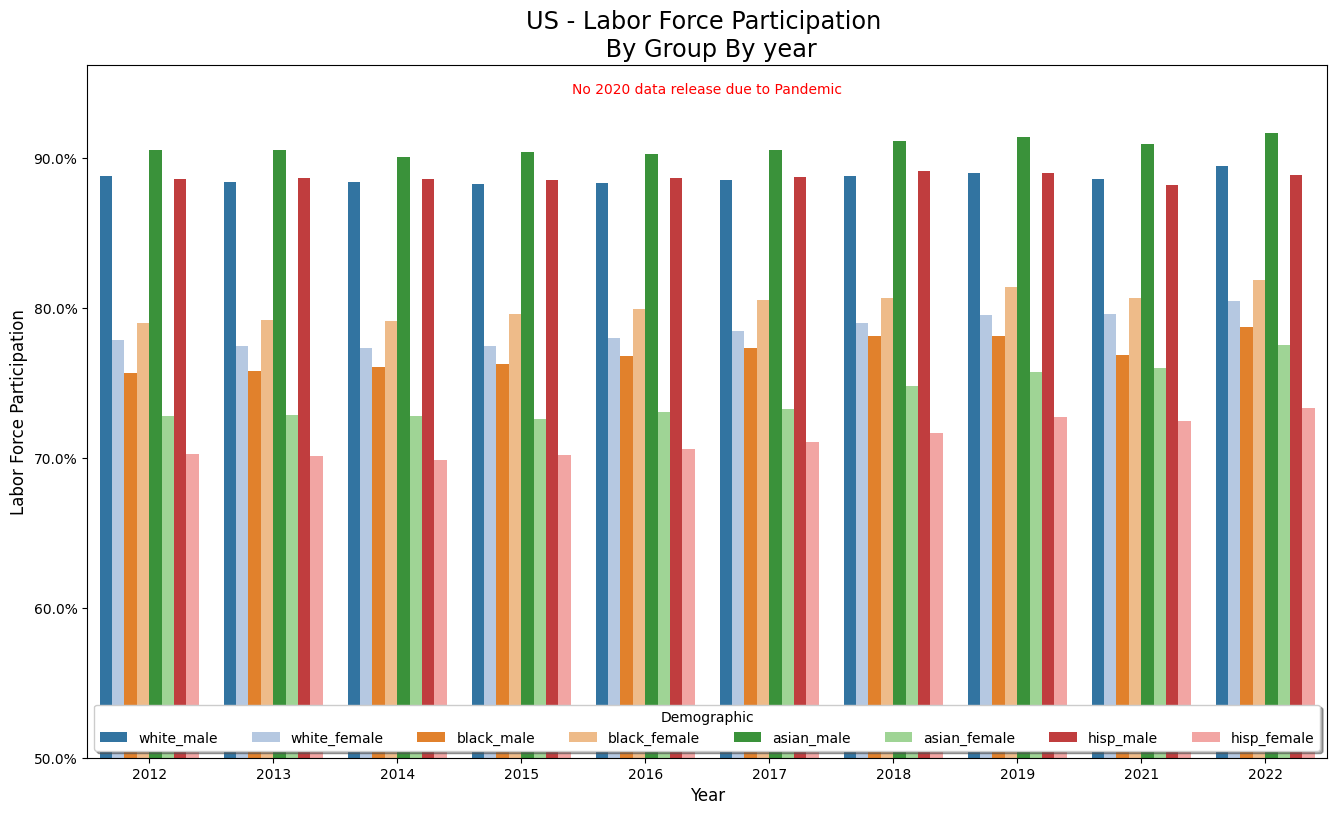

In [134]:
# Plot labor force particpation by group by year
plt.figure(figsize=(16,9))

with sns.color_palette("tab20", 8):
    ax = sns.barplot(data=lf_by_race_long, x='year', y='labor_force_participation', hue='demographic', )

# start the y-axis at 50 so it's easier to see the differences 
plt.ylim(50, None)

plt.title('US - Labor Force Participation \n By Group By year', fontsize='xx-large')

# Add a note about the year 2020
plt.text(4.5, 95, 'No 2020 data release due to Pandemic', ha='center', va='top', color='red', fontsize=10)


# Display our y-axis as a Percentage
ax.yaxis.set_major_formatter(PercentFormatter(100))
plt.ylabel('Labor Force Participation', fontsize="large")

plt.xlabel('Year', fontsize="large")

plt.legend(title='Demographic', title_fontsize='medium', fontsize="medium", shadow=True, ncols=8, mode='expand', loc='lower right' )
plt.show()